In [2]:

# Basics
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import joblib

# Load data
data = fetch_california_housing(as_frame=True)
df = pd.concat([data.data, data.target.rename('MedHouseVal')], axis=1)

# Display first few rows
df.head()


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [3]:
# Summary statistics
summary_stats = df.describe()
summary_stats


,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [4]:
# Check for missing values
missing_values = df.isnull().sum()
missing_values[missing_values > 0]


,0


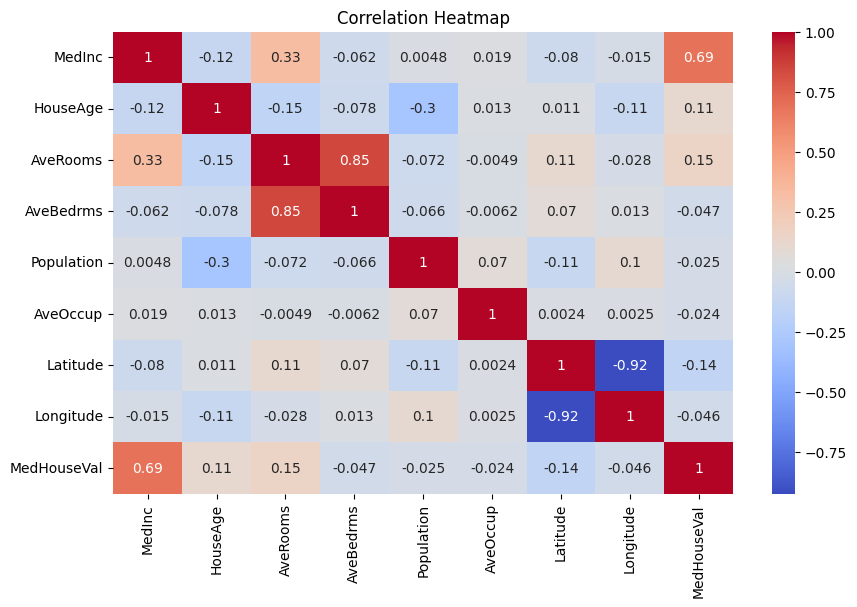

In [5]:
# Correlation Heatmap
plt.figure(figsize=(10, 6))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


In [6]:
# Feature-target split
X = df.drop(columns=['MedHouseVal'])
y = df['MedHouseVal']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [7]:
# Model training
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)


In [9]:
# Model metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae:.3f}, RMSE: {rmse:.3f}, R²: {r2:.3f}")

MAE: 0.533, RMSE: 0.746, R²: 0.576


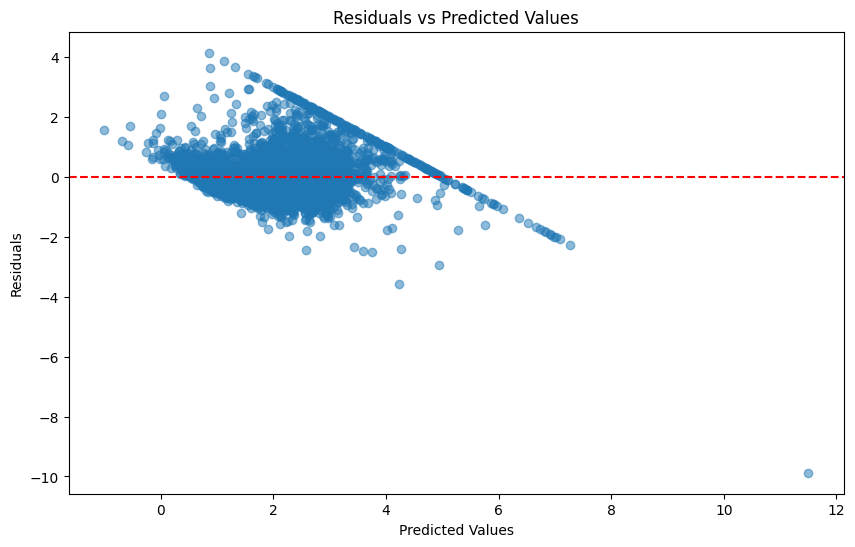

In [10]:
# Residuals
residuals = y_test - y_pred

# Residual Plot
plt.figure(figsize=(10, 6))
plt.scatter(y_pred, residuals, alpha=0.5)
plt.axhline(0, color='red', linestyle='--')
plt.xlabel("Predicted Values")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted Values")
plt.show()


In [11]:
# Coefficients
coefficients = pd.DataFrame(model.coef_, X.columns, columns=['Coefficient'])
coefficients


,Coefficient
MedInc,0.448675
HouseAge,0.009724
AveRooms,-0.123323
AveBedrms,0.783145
Population,-0.000002
AveOccup,-0.003526
Latitude,-0.419792
Longitude,-0.433708


In [12]:
# Save the trained model
joblib.dump(model, 'california_housing_model.pkl')


['california_housing_model.pkl']

In [14]:
# Load necessary libraries
import joblib
import pandas as pd

# Load the saved model
model = joblib.load('california_housing_model.pkl')

# Function to make predictions
def predict_house_value(med_inc, house_age, ave_rooms, ave_bedrms, population, ave_occup, latitude, longitude):
    input_data = pd.DataFrame({
        'MedInc': [med_inc],
        'HouseAge': [house_age],
        'AveRooms': [ave_rooms],
        'AveBedrms': [ave_bedrms],
        'Population': [population],
        'AveOccup': [ave_occup],
        'Latitude': [latitude],
        'Longitude': [longitude]
    })

    prediction = model.predict(input_data)
    return prediction[0]

# Example of getting user inputs (this will usually be hardcoded for testing)
median_income = float(input("Enter median income (MedInc): "))
house_age = float(input("Enter house age (HouseAge): "))
average_rooms = float(input("Enter average rooms (AveRooms): "))
average_bedrooms = float(input("Enter average bedrooms (AveBedrms): "))
population = float(input("Enter population (Population): "))
average_occupancy = float(input("Enter average occupancy (AveOccup): "))
latitude = float(input("Enter latitude (Latitude): "))
longitude = float(input("Enter longitude (Longitude): "))

# Making prediction
predicted_value = predict_house_value(median_income, house_age, average_rooms, average_bedrooms, population, average_occupancy, latitude, longitude)
print(f"Predicted House Value: ${predicted_value:.2f}")

Enter median income (MedInc): 20000
Enter house age (HouseAge): 5
Enter average rooms (AveRooms): 4
Enter average bedrooms (AveBedrms): 2
Enter population (Population): 10000
Enter average occupancy (AveOccup): 4
Enter latitude (Latitude): 01535
Enter longitude (Longitude): 14327
Predicted House Value: $2079.45
